In [63]:
# Import the required modules for basic data handling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
data = pd.read_csv('car_evaluation.csv', header = None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']
data.columns = col_names
data

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [65]:
# Bar plot function for visualisation

def barplotfunc(col, data, c):
    plt.figure()
    plt.title('Bar plot of ' + col)
    data[col].value_counts().plot(kind = 'bar', color = c)

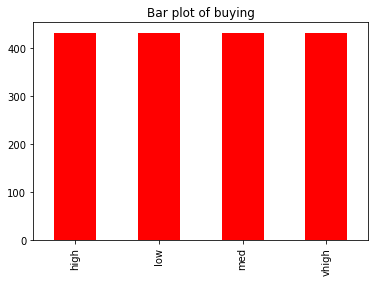

In [66]:
barplotfunc('buying', data, 'red')

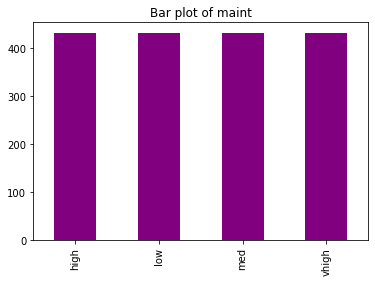

In [67]:
barplotfunc('maint', data, 'purple')

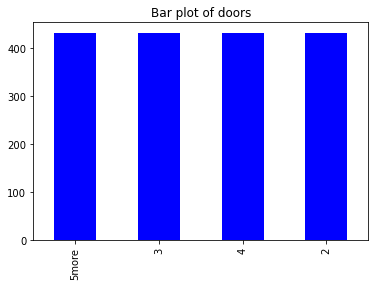

In [68]:
barplotfunc('doors', data, 'blue')

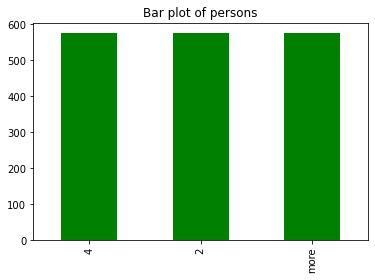

In [69]:
barplotfunc('persons', data, 'green')

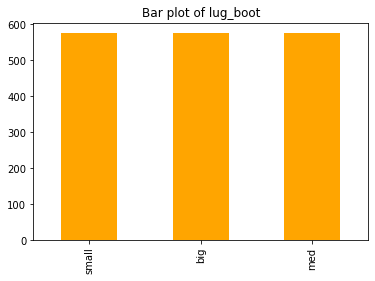

In [70]:
barplotfunc('lug_boot', data, 'orange')

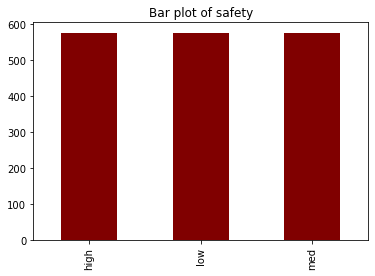

In [71]:
barplotfunc('safety', data, 'maroon')

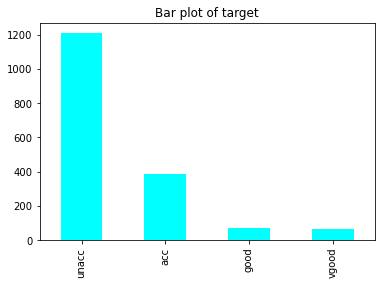

In [72]:
barplotfunc('target', data, 'cyan')

In [73]:
# encode variables with ordinal encoding

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
data = encoder.fit_transform(data)
data

,buying,maint,doors,persons,lug_boot,safety,target
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,good
1724,4,4,4,3,2,3,vgood
1725,4,4,4,3,3,1,unacc
1726,4,4,4,3,3,2,good


In [74]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 30)

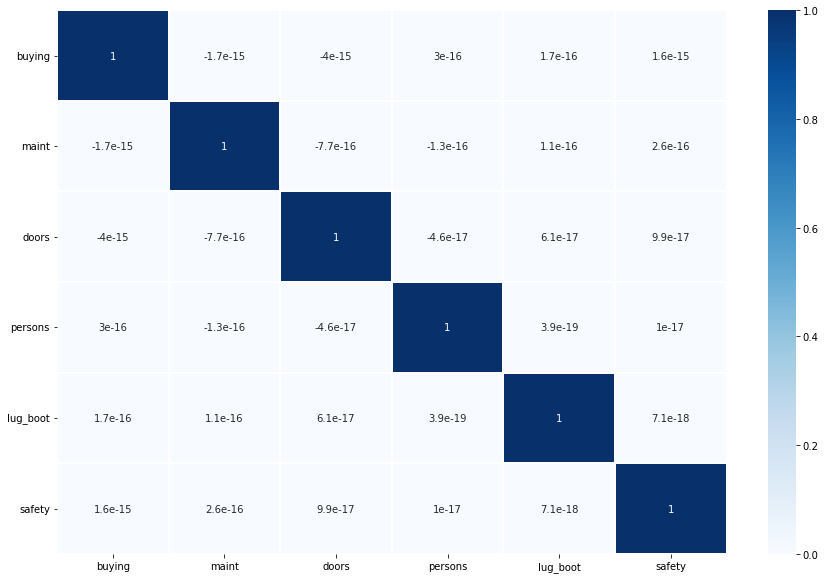

In [75]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

Text(0.5, 1.0, 'Training and test accuracy for Random Forest classifier \n vs number of decision trees')

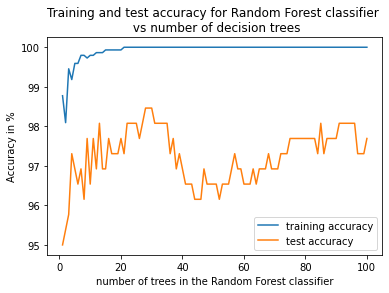

In [76]:
# import Random Forest classifier module

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# instantiate the Random Forest classifier model with different number of trees
y_pred_train, y_pred = [], []
train_acc, test_acc = [], []

# Fit the model to data. Make predictions using the model and check accuracy
rfc_model, numtrees = [], []

for i in range(1, 101):
    numtrees.append(i)
    rfc_model.append(RandomForestClassifier(n_estimators = i, max_features = 5, random_state = 0))
    rfc_model[i-1].fit(X_train, y_train)
    y_pred_train.append(rfc_model[i-1].predict(X_train))
    y_pred.append(rfc_model[i-1].predict(X_test))
    train_acc.append(accuracy_score(y_train, y_pred_train[i-1]) * 100)
    test_acc.append(accuracy_score(y_test, y_pred[i-1]) * 100)

plt.plot(numtrees, train_acc)
plt.plot(numtrees, test_acc)
plt.legend(['training accuracy', 'test accuracy'])
plt.xlabel('number of trees in the Random Forest classifier')
plt.ylabel('Accuracy in %')
plt.title('Training and test accuracy for Random Forest classifier \n vs number of decision trees')

Text(0.5, 1.0, 'Training and test accuracy for Random Forest classifier with \n 25 trees vs percentage of data used as test data')

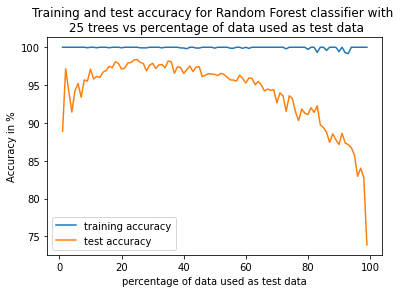

In [77]:
# Accuracy for different test dataset sizes

train_acc2, test_acc2, numtestsize = [], [], []

for i in range(1, 100):
    numtestsize.append(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i / 100, random_state = 0)
    rfc_model_2 = RandomForestClassifier(n_estimators = 25, max_features = 5, random_state = 0)
    rfc_model_2.fit(X_train, y_train)
    y_pred_train2 = rfc_model_2.predict(X_train)
    y_pred2 = rfc_model_2.predict(X_test)
    train_acc2.append(accuracy_score(y_train, y_pred_train2) * 100)
    test_acc2.append(accuracy_score(y_test, y_pred2) * 100)
    
plt.plot(numtestsize, train_acc2)
plt.plot(numtestsize, test_acc2)
plt.legend(['training accuracy', 'test accuracy'])
plt.xlabel('percentage of data used as test data')
plt.ylabel('Accuracy in %')
plt.title('Training and test accuracy for Random Forest classifier with \n 25 trees vs percentage of data used as test data')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
finalrfc_model = RandomForestClassifier(n_estimators = 25, max_features = 5, random_state = 0)
finalrfc_model.fit(X_train, y_train)
y_pred_train_final = finalrfc_model.predict(X_train)
y_pred_final = finalrfc_model.predict(X_test)

print('Training accuracy score with 27 decision trees trained on 79% of the data : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_final)*100))
print('Test accuracy score with 27 decision trees trained on 79% of the data : {0:0.4f}'. format(accuracy_score(y_test, y_pred_final)*100))

Training accuracy score with 27 decision trees trained on 79% of the data : 100.0000
Test accuracy score with 27 decision trees trained on 79% of the data : 98.3796


In [79]:
feature_scores = pd.Series(finalrfc_model.feature_importances_, index = X_train.columns).sort_values(ascending=False)
print(feature_scores)

safety      0.270473
persons     0.251715
maint       0.154928
buying      0.135064
lug_boot    0.131752
doors       0.056068
dtype: float64


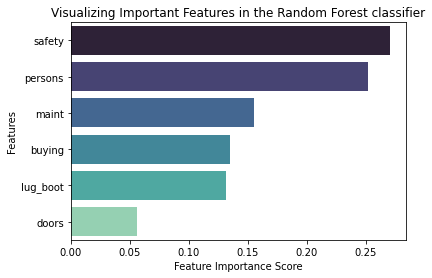

In [80]:
ax = sns.barplot(x = feature_scores, y = feature_scores.index, palette=("mako"))

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features in the Random Forest classifier")
plt.show()

<AxesSubplot:>

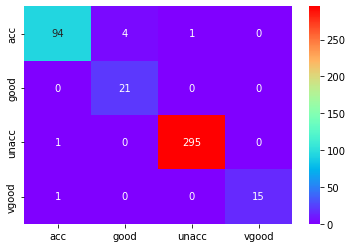

In [81]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_final)

cm_matrix = pd.DataFrame(data = cm1, columns = ['acc', 'good', 'unacc', 'vgood'], index = ['acc', 'good', 'unacc', 'vgood'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'rainbow')

<AxesSubplot:>

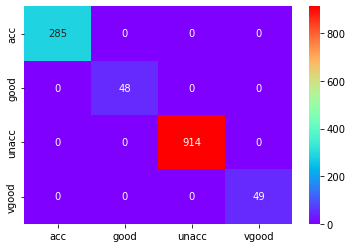

In [82]:
cm2 = confusion_matrix(y_train, y_pred_train_final)

cm_matrix = pd.DataFrame(data = cm2, columns = ['acc', 'good', 'unacc', 'vgood'], index = ['acc', 'good', 'unacc', 'vgood'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'rainbow')

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

         acc       0.98      0.95      0.96        99
        good       0.84      1.00      0.91        21
       unacc       1.00      1.00      1.00       296
       vgood       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.95      0.97      0.96       432
weighted avg       0.99      0.98      0.98       432

